# BoomBikes 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
df = pd.read_csv(r'C:\Users\adshrivastava\Documents\R\others\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Analysis of Categorical variables

In [4]:
# Season
df.groupby(by = ['season']).cnt.sum()

season
1     469514
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

- Mostly people do not prefer to rent a bike in spring

In [5]:
# Weathersit
df.groupby(by = ['weathersit']).cnt.sum()

weathersit
1    2257952
2     995024
3      37869
Name: cnt, dtype: int64

- People prefer to rent a bike in Clear, Few clouds, Partly cloudy, Partly cloudy weather

In [6]:
# Year
df.groupby(by = ['yr']).cnt.sum()

yr
0    1243103
1    2047742
Name: cnt, dtype: int64

- There is increase in the rentals from 2018 to 2019

In [7]:
# Month
df.groupby(by = ['mnth']).cnt.sum()

mnth
1     134933
2     149518
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

- There is increase in the demand for rental bikes from June to October

In [8]:
# Weekday
df.groupby(by = ['weekday']).cnt.sum()

weekday
0    485235
1    447281
2    448822
3    462276
4    487923
5    478132
6    481176
Name: cnt, dtype: int64

- Demand for Rental bikes is nearly same across the days of the week

In [9]:
# Workingday
df.groupby(by = ['workingday']).cnt.sum()

workingday
0    1036857
1    2253988
Name: cnt, dtype: int64

- It seems that people prefer to use rental on working day more than non-working day. This could be because they might prefer to go to office using rental bikes

## Mapping of variables

In [10]:
# Season
df['season'] = df['season'].replace([1,2,3,4],['spring','summer','fall','winter'])

# Month
df['mnth'] = df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

# Weekday
df['weekday'] = df['weekday'].replace([0,1,2,3,4,5,6],['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])

# Weathersit
df['weathersit'] = df['weathersit'].replace([1,2,3,4],['clear','mist+cloudy','light snow','rain'])

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,monday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tuesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating dummy variables

In [11]:
# Season
season = pd.get_dummies((df['season']),drop_first = True).rename(columns=lambda x: str(x))
df = pd.concat([df,season], axis = 1)
df = df.drop('season', axis = 1)

# Month
month = pd.get_dummies((df['mnth']),drop_first = True).rename(columns=lambda x: str(x))
df = pd.concat([df,month], axis = 1)
df = df.drop('mnth', axis = 1)

# Weekday
weekday = pd.get_dummies((df['weekday']),drop_first = True).rename(columns=lambda x: str(x))
df = pd.concat([df,weekday], axis = 1)
df = df.drop('weekday', axis = 1)

# Weathersit
weathersit = pd.get_dummies((df['weathersit']),drop_first = True).rename(columns=lambda x: str(x))
df = pd.concat([df,weathersit], axis = 1)
df = df.drop('weathersit', axis = 1)
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist+cloudy
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# dropping column which are not required 
df.drop(['dteday','instant','casual','registered'], axis='columns', inplace=True)

### Splitting into test and train

In [13]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling of variables

In [14]:
# Using Min-Max scaling (normalization)

# 1. Instantiate an Object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp', 'hum','windspeed','cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist+cloudy
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,11.5850,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,16.0977,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
yr             510 non-null int64
holiday        510 non-null int64
workingday     510 non-null int64
temp           510 non-null float64
atemp          510 non-null float64
hum            510 non-null float64
windspeed      510 non-null float64
cnt            510 non-null float64
spring         510 non-null uint8
summer         510 non-null uint8
winter         510 non-null uint8
aug            510 non-null uint8
dec            510 non-null uint8
feb            510 non-null uint8
jan            510 non-null uint8
jul            510 non-null uint8
jun            510 non-null uint8
mar            510 non-null uint8
may            510 non-null uint8
nov            510 non-null uint8
oct            510 non-null uint8
sep            510 non-null uint8
monday         510 non-null uint8
saturday       510 non-null uint8
sunday         510 non-null uint8
thursday       510 non-null uint8

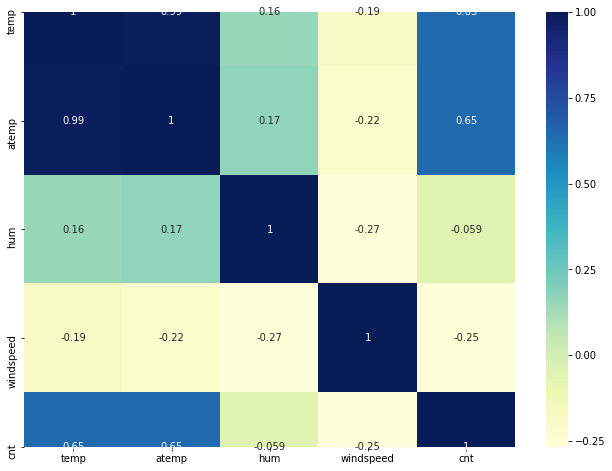

In [16]:
# heatmap for correlation among variables

plt.figure(figsize = (11,8))
sns.heatmap(df_train[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap = 'YlGnBu')
plt.show()

In [17]:
# dropping atemp as it has high correlation with temp
df.drop(['atemp'], axis='columns', inplace=True)

In [18]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

In [19]:
# importing RFE and LienarRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [20]:
# Running RFE with output number of variable equalto 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [21]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'light snow', 'mist+cloudy'], dtype='object')

In [22]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'], dtype='object')

## Building Model

In [23]:
#creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [24]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [25]:
# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.15e-189
Time:                        10:16:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      

In [26]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist+cloudy,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


In [27]:
# dropping feature "dec" as it has high p-value
X_train_rfe = X_train_rfe.drop(['dec'], axis = 1)

# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.41e-189
Time:                        10:16:16   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3032      0.035      8.598      

In [28]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.09
2,temp,16.80
4,windspeed,4.72
5,spring,4.37
7,winter,3.78
6,summer,2.80
13,mist+cloudy,2.29
0,yr,2.09
8,jan,1.67
10,nov,1.60


In [29]:
# dropping feature "nov" as it has high p-value
X_train_rfe = X_train_rfe.drop(['nov'], axis = 1)

# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.59e-190
Time:                        10:16:17   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2964      0.035      8.483      

In [30]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
5,spring,4.34
7,winter,3.36
6,summer,2.79
12,mist+cloudy,2.29
0,yr,2.09
8,jan,1.67
9,jul,1.59


In [31]:
# dropping feature "jan" as it has high p-value
X_train_rfe = X_train_rfe.drop(['jan'], axis = 1)

# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.95e-190
Time:                        10:16:17   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2848      0.034      8.258      

In [32]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
11,mist+cloudy,2.28
0,yr,2.08
8,jul,1.58
9,sep,1.38


In [33]:
# dropping feature "hum" as it has high VIF
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.06e-187
Time:                        10:16:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.746      

In [34]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,jul,1.58
10,mist+cloudy,1.55
8,sep,1.34
9,light snow,1.08


In [35]:
# dropping feature "jul" as it does not affect model and keeps the r-square nearly same
X_train_rfe = X_train_rfe.drop(['jul'], axis = 1)

# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.47e-186
Time:                        10:16:17   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1909      0.030      6.447      

In [36]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,mist+cloudy,1.55
7,sep,1.23
8,light snow,1.08
1,holiday,1.04


In [37]:
# dropping feature "spring" as it does not affect model and keeps the r-square nearly same
X_train_rfe = X_train_rfe.drop(['spring'], axis = 1)

# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.83e-186
Time:                        10:16:17   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1259      0.017      7.508      

In [38]:
# dropping constant
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
8,mist+cloudy,1.48
5,winter,1.37
6,sep,1.20
7,light snow,1.08
1,holiday,1.04


In [39]:
# Final features in the model
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'sep', 'light snow', 'mist+cloudy'], dtype='object')

## Residual Analysis

In [40]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

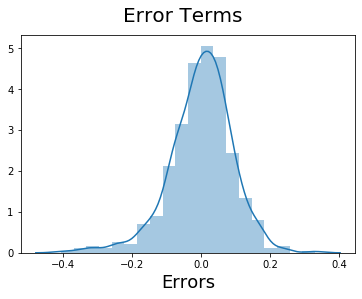

In [41]:
# plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Error terms are normally distributed around mean equal to zero

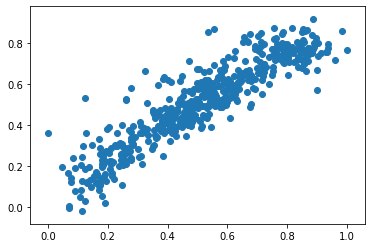

In [42]:
plt.scatter(y_train, y_train_cnt)

- Error terms are independent and have a constant variance

## Making Prediction
### Applying scaling on test set

In [43]:
# 2. Fit on data
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist+cloudy
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,32.19710,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Dividing into X_test and y_test

In [44]:
y_test = df_test.pop('cnt')
y_test.values.reshape(-1,1)
X_test = df_test

In [45]:
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [46]:
# Now let's use our model to make prediction
X_test_new = X_test[X_train_new.columns]
    
# Adding a constant Variable
X_test_new = sm.add_constant(X_test_new)

In [47]:
# Making prediction
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

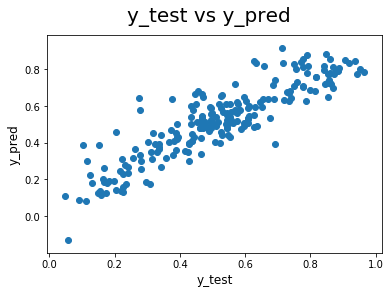

In [48]:
# plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)

In [49]:
# evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.7941977535477242

### Comments
- The r-score of train model comes out to be 83% and the r-score of test is 79.4% which is good